# QFT

Implement exercises from the following:
[https://pennylane.ai/codebook/08-quantum-fourier-transform/03-connecting-the-dots/](https://pennylane.ai/codebook/08-quantum-fourier-transform/03-connecting-the-dots/)

In [19]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Three Qubit QFT

In [26]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    """A circuit that computes the QFT on three qubits.
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
        
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1, 2])
    
    ##################
    # YOUR CODE HERE #
    ##################
    
    return qml.state()

In [34]:
three_qubit_QFT(5)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

(<Figure size 400x400 with 1 Axes>, <Axes: >)

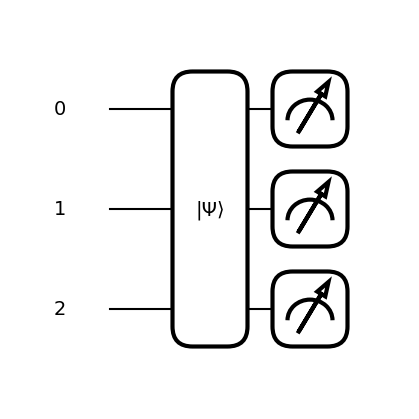

In [31]:
qml.draw_mpl(three_qubit_QFT, show_all_wires=True)(5)

## Task 2: Swap bits

In [36]:
dev = qml.device('default.qubit', wires=4)

            
def swap_bits(n_qubits):
    """A circuit that reverses the order of qubits, i.e.,
    performs a SWAP such that [q1, q2, ..., qn] -> [qn, ... q2, q1].
    
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    ##################
    # YOUR CODE HERE #
    ##################

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    # qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [37]:
qft_node(5, 4)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

(<Figure size 400x500 with 1 Axes>, <Axes: >)

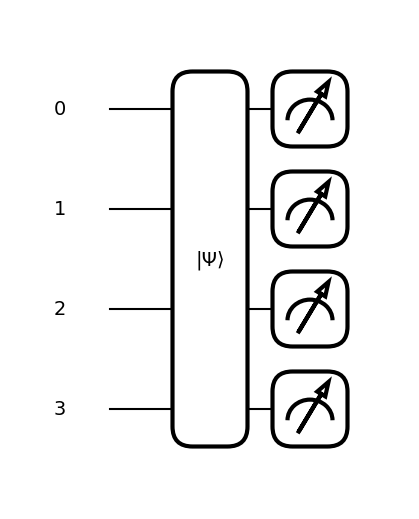

In [38]:
qml.draw_mpl(qft_node, show_all_wires=True)(5, 4)

## Task 3: Putting the QFT together

In [48]:
dev = qml.device('default.qubit', wires=3)

def qft_rotations(n_qubits):
    """A circuit performs the QFT rotations on the specified qubits.
    
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """

    ##################
    # YOUR CODE HERE #
    ##################

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()


In [49]:
qft_node(5, 3)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

(<Figure size 400x400 with 1 Axes>, <Axes: >)

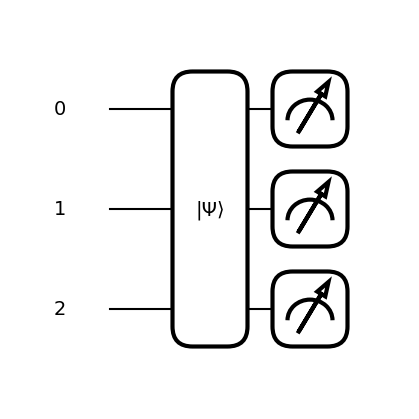

In [50]:
qml.draw_mpl(qft_node, show_all_wires=True)(5, 3)

## Task 4: A recursive solution

In [51]:
dev = qml.device('default.qubit', wires=4)

def qft_recursive_rotations(n_qubits, wire=0):
    """A circuit that performs the QFT rotations on the specified qubits
        recursively.
        
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
        wire (int): An integer identifying the wire 
                    (or the qubit) to apply rotations on.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    
def swap_bits(n_qubits):
    """
    A circuit that reverses the order of qubits, i.e.,
    performs a SWAP such that [q1, q2, ... qn] -> [qn .. q2, q1 ]
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    Returns:
        array[complex]: The state of the qubits reversed.
    """
    
    for qubit in range(n_qubits//2):
        qml.SWAP(wires=[qubit, n_qubits-qubit-1])


@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_recursive_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [52]:
qft_node(5, 4)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

(<Figure size 600x500 with 1 Axes>, <Axes: >)

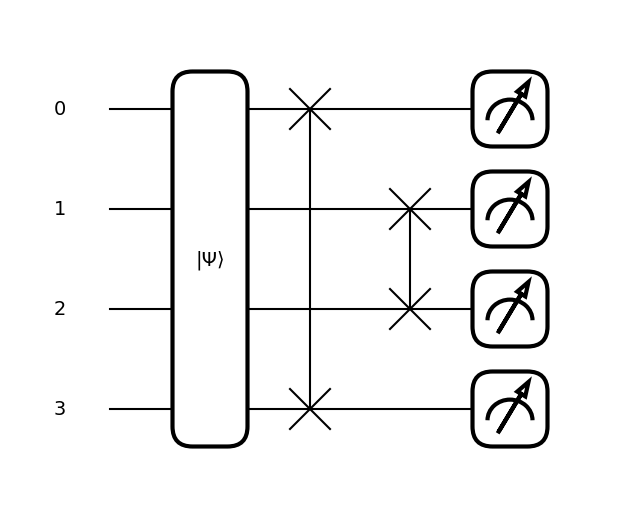

In [53]:
qml.draw_mpl(qft_node, show_all_wires=True)(5, 4)

## Task 5: The QFT in PennyLane

In [62]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def pennylane_qft(basis_id, n_qubits):
    """A that circuit performs the QFT using PennyLane's QFT template.
    
    Args:
        basis_id (int): An integer value identifying 
            the basis state to construct.
        n_qubits (int): An integer identifying the 
            number of qubits.
            
    Returns:
        array[complex]: The state after applying the QFT to the qubits.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))

    ##################
    # YOUR CODE HERE #
    ##################

    return qml.state()

In [63]:
pennylane_qft(1, 1)

array([0.+0.j, 1.+0.j])

(<Figure size 400x200 with 1 Axes>, <Axes: >)

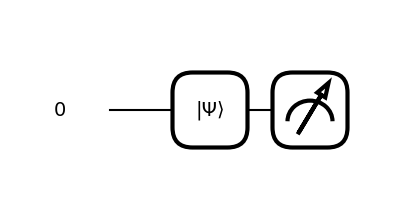

In [64]:
qml.draw_mpl(pennylane_qft, show_all_wires=True)(1, 1)

## Task 6: Quantum Addition

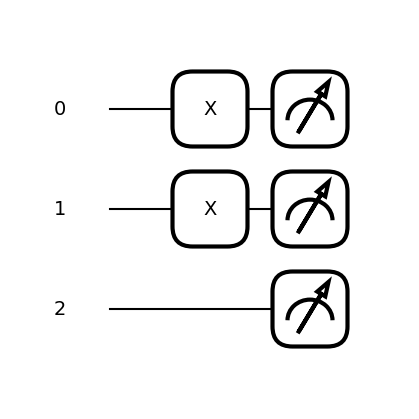

In [65]:
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3)

@qml.compile
@qml.qnode(dev)
def basis_embedding_circuit(m):
    qml.BasisEmbedding(m, wires=range(3))
    return qml.state()

m = 6 # number to be encoded

qml.draw_mpl(basis_embedding_circuit, show_all_wires=True)(m)
plt.show()

In [67]:
import pennylane as qml
import numpy as np

n_wires = 3
dev = qml.device("default.qubit", wires=n_wires, shots=1)

def add_k_fourier(k, wires):
    ##################
    # YOUR CODE HERE #
    ##################

@qml.qnode(dev)
def sum(m, k):
    qml.BasisEmbedding(m, wires=range(n_wires))  # m encoding

    # Step 1: Apply QFT to convert to Fourier basis
    qml.templates.QFT(wires=range(n_wires))

    # Step 2: Add k in Fourier basis using phase shifts
    add_k_fourier(k, wires=range(n_wires))

    # Step 3: Apply inverse QFT to return to computational basis
    # qml.templates.QFT(wires=range(n_wires)).inv()
    qml.adjoint(qml.templates.QFT)(wires=range(n_wires))


    return qml.sample()


print(f"The ket representation of the sum of 3 and 4 is {sum(3,4)}")

IndentationError: expected an indented block after function definition on line 7 (3936937629.py, line 12)